In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('kidney_disease (1).csv')
pd.set_option('display.max_columns', 500)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells',
                     'pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea',
                     'sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume',
                     'wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus',
                     'cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'classes'},inplace=True)
df.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.columns

Index(['id', 'age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'classes'],
      dtype='object')

In [5]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

display(num.head())
display(cat.head())

,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


,red blood cells,pus cell,pus cell clumps,bacteria,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
def converter(df):
    df= pd.to_numeric(df, errors = 'coerce')
    return df

data = df.copy()
converter(data['packed cell volume'])
converter(data['white blood cell count'])
converter(data['red blood cell count'])

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: red blood cell count, Length: 400, dtype: float64

DATA PREPROCESSING

In [7]:
data = df.copy()

from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

for i in cat:
    if i in data:
        data[i] = label_encode.fit_transform(data[i])
df

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


FEATURE SELECTION

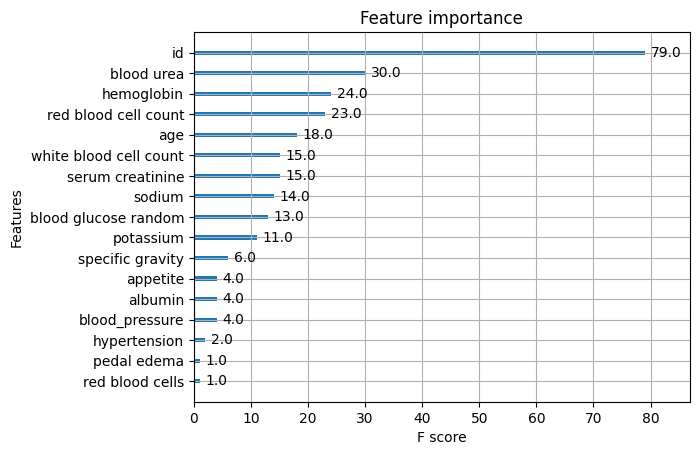

In [8]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = data.drop('classes', axis = 1)
y = data.classes

model.fit(x, y)

# plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [9]:
sel_cols = ['blood urea', 'hemoglobin', 'red blood cell count', 'age', 'white blood cell count', 'serum creatinine', 'sodium', 'classes']
sel_data = data[sel_cols]
sel_data

,blood urea,hemoglobin,red blood cell count,age,white blood cell count,serum creatinine,sodium,classes
0,36.0,15.4,34,48.0,72,1.2,NaN,0
1,18.0,11.3,49,7.0,56,0.8,NaN,0
2,53.0,9.6,49,62.0,70,1.8,NaN,0
3,56.0,11.2,19,48.0,62,3.8,111.0,0
4,26.0,11.6,27,51.0,68,1.4,NaN,0
...,...,...,...,...,...,...,...,...
395,49.0,15.7,30,55.0,62,0.5,150.0,2
396,31.0,16.5,44,42.0,72,1.2,141.0,2
397,26.0,15.8,36,12.0,61,0.6,137.0,2
398,50.0,14.2,41,17.0,67,1.0,135.0,2


In [10]:
sel_data.dropna(inplace = True)
sel_data.shape

(271, 8)

<Axes: xlabel='classes', ylabel='count'>

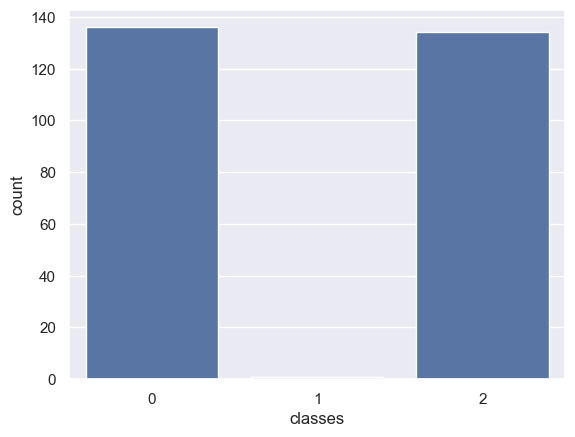

In [11]:
sns.set(style = 'darkgrid')
sns.countplot(x = sel_data.classes)

<Axes: xlabel='classes', ylabel='count'>

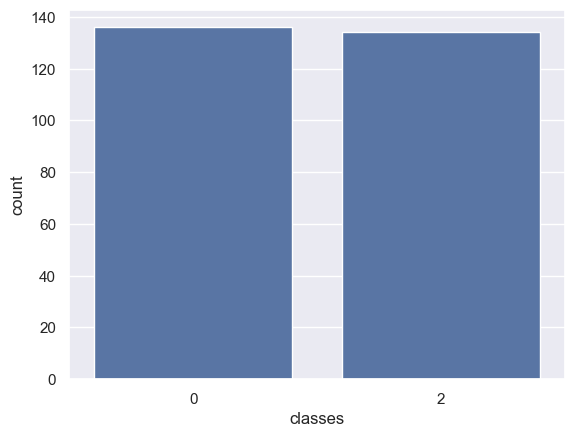

In [12]:
sel_data = sel_data.loc[sel_data['classes'] != 1]
sns.countplot(x = sel_data.classes)

In [13]:
# Split Into Train and Test
x = sel_data.drop('classes', axis = 1)
y = sel_data.classes

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

MODEL SELECTION

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier()

rf_model.fit(xtrain, ytrain)
cross_val = print(classification_report(rf_model.predict(xtrain), ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       107

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [15]:
print(classification_report(rf_model.predict(xtest), ytest))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           2       1.00      0.96      0.98        28

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [16]:
# serialise transformers and model
import joblib

joblib.dump(label_encode, 'encoder.pkl')
joblib.dump(rf_model, 'kidney_model.pkl')

['kidney_model.pkl']

In [17]:
imported_model = joblib.load('kidney_model.pkl')
imported_model

RandomForestClassifier()

MODEL DEPLOYMENT DEMO

In [18]:
# new patients data to predict the classes of their kidney disease
new_patients = data.sample(10)
new_patients = new_patients[sel_cols].drop('classes', axis = 1)
new_patients

,blood urea,hemoglobin,red blood cell count,age,white blood cell count,serum creatinine,sodium
235,93.0,7.9,49,45.0,53,2.3,NaN
154,132.0,8.4,9,56.0,92,16.4,140.0
33,55.0,10.1,49,60.0,92,2.5,NaN
371,50.0,17.6,32,28.0,60,0.5,145.0
57,155.0,NaN,49,76.0,92,7.3,132.0
187,22.0,10.7,49,3.0,20,0.7,NaN
266,17.0,13.2,35,55.0,63,1.2,135.0
108,15.0,11.8,23,45.0,3,1.0,141.0
90,35.0,13.0,23,63.0,90,3.2,143.0
268,49.0,16.3,30,NaN,79,1.0,140.0


In [19]:
new_patients.dropna(inplace = True)
new_patients

,blood urea,hemoglobin,red blood cell count,age,white blood cell count,serum creatinine,sodium
154,132.0,8.4,9,56.0,92,16.4,140.0
371,50.0,17.6,32,28.0,60,0.5,145.0
266,17.0,13.2,35,55.0,63,1.2,135.0
108,15.0,11.8,23,45.0,3,1.0,141.0
90,35.0,13.0,23,63.0,90,3.2,143.0


In [20]:
imported_model.predict(new_patients)

array([0, 2, 2, 0, 0])

In [21]:
df.iloc[341]['classes']

'notckd'